<ipython-input-1-b171da1e7663>:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time']).dt.time


First few rows of the dataset: 

   TransactionID       Date      Time CustomerID Product  Price
0              1 2023-10-26  08:00:00         A1  Coffee    3.5
1              2 2023-10-26  09:00:00         A2   Latte    4.5
2              3 2023-10-26  10:00:00         A1  Coffee    3.5
3              4 2023-10-27  11:00:00         A3  Pastry    2.5
4              5 2023-10-27  12:00:00         A2   Latte    4.5

Missing values before cleaning:

TransactionID    0
Date             0
Time             0
CustomerID       0
Product          0
Price            0
dtype: int64

Total Transactions: 12
Total Revenue: $41.50
Average Spending per Customer: $3.46

Product Counts:
 Product
Coffee    5
Latte     3
Pastry    3
Tea       1
Name: count, dtype: int64
Most Popular Product: Coffee

Purchase totals by hour:
 Hour
8     3.5
9     9.0
10    7.0
11    5.0
12    4.5
13    3.5
14    3.5
15    2.5
16    3.0
Name: Price, dtype: float64

Monthly sales:
 Month
10    41.5
Name: Price, dtype: float6

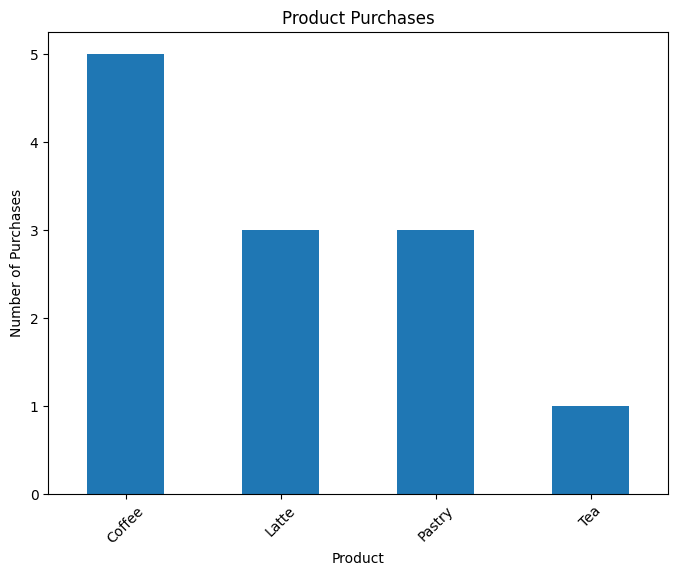

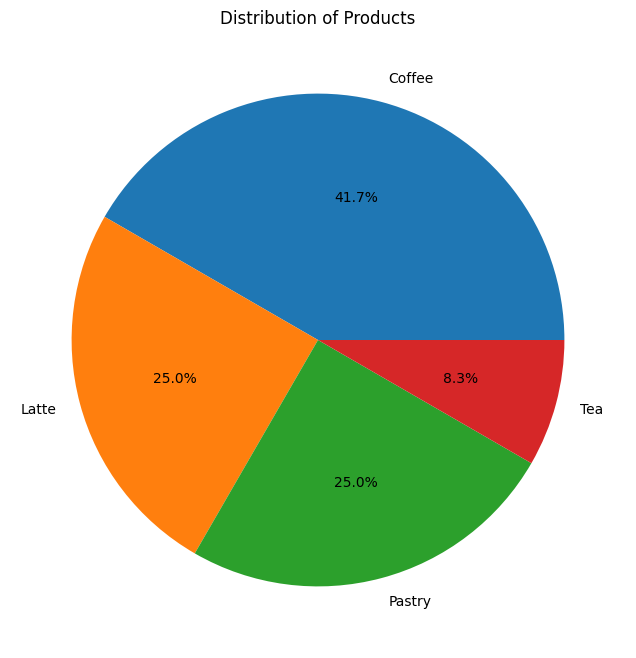

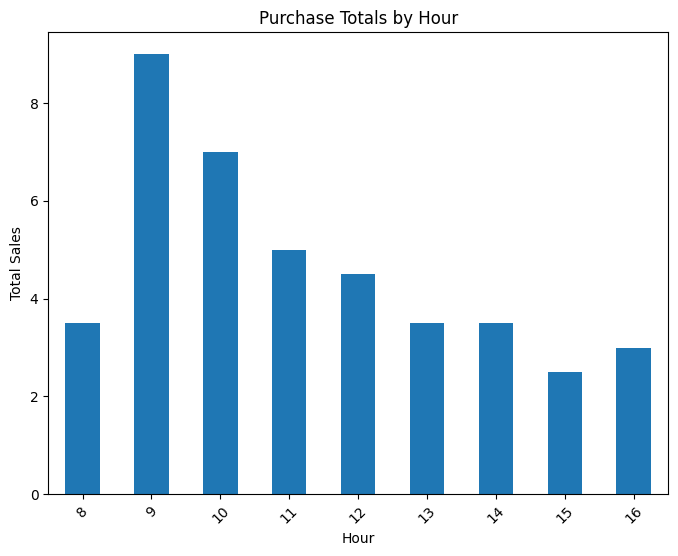

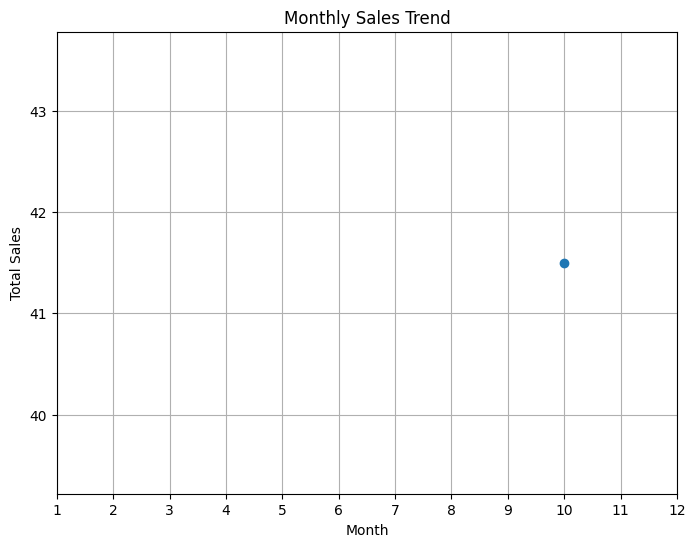


---Interpretation & Insights---
Total transactions: 12, with total revenue: $41.50
The most popular product is: Coffee.
The purchase totals by hour show that most sales occur around midday.
The line plot suggests sales trend has remained consistent in the single month recorded.
This information can help the coffee shop owner make decisions about staffing, menu and promotions

---Conclusion & Next Steps---
This project provided a basic overview of the sales in this example coffee shop.
Next steps could involve collecting more data, adding more features, or more advanced analysis


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Set up the Environment & Import Libraries
# Pandas is used to work with data in a table format
# Matplotlib is used for creating charts and graphs

# 2. Load the Dataset
# Here we create a dataframe from an example, in reality this will be read from a csv file
data = {
    'TransactionID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'Date': ['2023-10-26', '2023-10-26', '2023-10-26', '2023-10-27', '2023-10-27', '2023-10-27', '2023-10-28', '2023-10-28', '2023-10-28', '2023-10-29', '2023-10-29', '2023-10-29'],
    'Time': ['08:00', '09:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '09:00', '10:00', '11:00'],
    'CustomerID': ['A1', 'A2', 'A1', 'A3', 'A2', 'A4', 'A1', 'A3', 'A5', 'A2', 'A4', 'A5'],
    'Product': ['Coffee', 'Latte', 'Coffee', 'Pastry', 'Latte', 'Coffee', 'Coffee', 'Pastry', 'Tea', 'Latte', 'Coffee', 'Pastry'],
    'Price': [3.5, 4.5, 3.5, 2.5, 4.5, 3.5, 3.5, 2.5, 3.0, 4.5, 3.5, 2.5]
}
df = pd.DataFrame(data)

# let's convert the date column to datetime for future time based aggregations
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time']).dt.time

print("First few rows of the dataset: \n")
print(df.head())

# 3. Data Cleaning
# Check for missing values
print("\nMissing values before cleaning:\n")
print(df.isnull().sum())

# 4. Data Analysis
# Total number of transactions
total_transactions = df.shape[0]
print(f'\nTotal Transactions: {total_transactions}')

# Total Revenue
total_revenue = df['Price'].sum()
print(f'Total Revenue: ${total_revenue:.2f}')

# Average spending per customer
average_spending = df['Price'].mean()
print(f'Average Spending per Customer: ${average_spending:.2f}')

# Most popular product
product_counts = df['Product'].value_counts()
print("\nProduct Counts:\n", product_counts)
most_popular_product = product_counts.idxmax()
print(f'Most Popular Product: {most_popular_product}')

# Purchase total by hour of the day
df['Hour'] = [t.hour for t in df['Time']]
purchases_by_hour = df.groupby('Hour')['Price'].sum()
print("\nPurchase totals by hour:\n", purchases_by_hour)

# Calculate monthly totals
df['Month'] = df['Date'].dt.month
monthly_sales = df.groupby('Month')['Price'].sum()
print("\nMonthly sales:\n", monthly_sales)

# 5. Data Visualization
# Bar chart for product counts
plt.figure(figsize=(8, 6))
product_counts.plot(kind='bar')
plt.title('Product Purchases')
plt.xlabel('Product')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.show()

# Pie chart for popular products
plt.figure(figsize=(8, 8))
plt.pie(product_counts, labels=product_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Products')
plt.show()

# bar chart for purchase totals by hour
plt.figure(figsize=(8, 6))
purchases_by_hour.plot(kind='bar')
plt.title('Purchase Totals by Hour')
plt.xlabel('Hour')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


# Line chart for monthly sales
plt.figure(figsize=(8, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

# 6. Interpretation & Insights
print('\n---Interpretation & Insights---')
print(f'Total transactions: {total_transactions}, with total revenue: ${total_revenue:.2f}')
print(f'The most popular product is: {most_popular_product}.')
print('The purchase totals by hour show that most sales occur around midday.')
print('The line plot suggests sales trend has remained consistent in the single month recorded.')
print('This information can help the coffee shop owner make decisions about staffing, menu and promotions')

# 7. Conclusion & Next Steps
print('\n---Conclusion & Next Steps---')
print('This project provided a basic overview of the sales in this example coffee shop.')
print('Next steps could involve collecting more data, adding more features, or more advanced analysis')